# **Detection Myocardial Infraction Using Pathological Q Waves & ST Segment Elevation as a Feature**

## Overview
This project conducted a classification of myocardial infraction disease using pathological q waves and st segment elevation features. Using data provided in the physionet retrieved 18 data of myocardial infraction sufferers and 18 normal data. using Third-Party Packages Neurokit2 to get PQRST Waves on ECG signals

# Myocardial Infraction

Myocardial infraction occurs when or more areas of the heart do not get enough oxygen supply due to blocked blood flow to the heart. Blocked blood flow to the heart is caused by plaque buildup in the arteries (atherosclerosis). Plaque consists of cholesterol, fat and other waste products from the body. When plaque ruptures or disintegrates it will form a blood clot, this blood clot is the cause of Myocardial Infraction. If blood flow to the heart is blocked by blood clots then the heart muscle cells will be damaged and begin to die. When more than 30 minutes of damage to the heart muscle cells will begin to be severe and will be irreversible. As a result, the heart muscle will lack oxygen because blood flow to the heart is blocked and will not function as it should because it is damaged. There are two factors that put a person at risk of suffering from Myocardial Infraction, namely hereditary factors and internal factors such as lifestyle. One of the symptoms experienced by myocardial infraction sufferers is chest pain but chest pain can also be caused by other conditions.

In [1]:
!pip3 install neurokit2

     |████████████████████████████████| 1.0 MB 21.6 MB/s 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import os
import neurokit2 as nk
import glob

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

# Dataset from Physionet
Data taken from PTB-XL physionet by taking several subjects that are used as datasets. The database contains measurements using 12 ecg leads for 10 seconds per subject. 18 subjects with myocardial infraction were then taken and 18 normal subjects.

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
pwd

'/content'

In [5]:
%cd /content/gdrive/My Drive/MI_Dataset 

/content/gdrive/My Drive/MI_Dataset


In [6]:
ls

MI/  myocardial_dataset.csv  NORM/  svm.sav


In [7]:
df_test = pd.read_csv('MI/1.txt', sep='\t', header=None)
df_test.columns = ['Time (elapsed)', 'i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
df_test.head()

,Time (elapsed),i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6
0,00:00:00.000,-0.125,-0.290,-0.165,0.208,0.020,-0.227,0.055,0.265,0.110,0.234,0.016,-0.079
1,00:00:00.010,-0.123,-0.286,-0.164,0.205,0.021,-0.225,0.052,0.263,0.110,0.240,0.021,-0.071
2,00:00:00.020,-0.121,-0.281,-0.160,0.201,0.020,-0.220,0.046,0.256,0.110,0.253,0.024,-0.058
3,00:00:00.030,-0.123,-0.276,-0.153,0.200,0.015,-0.214,0.041,0.251,0.110,0.249,0.017,-0.048
4,00:00:00.040,-0.096,-0.269,-0.173,0.183,0.039,-0.221,0.035,0.245,0.105,0.250,0.010,-0.043


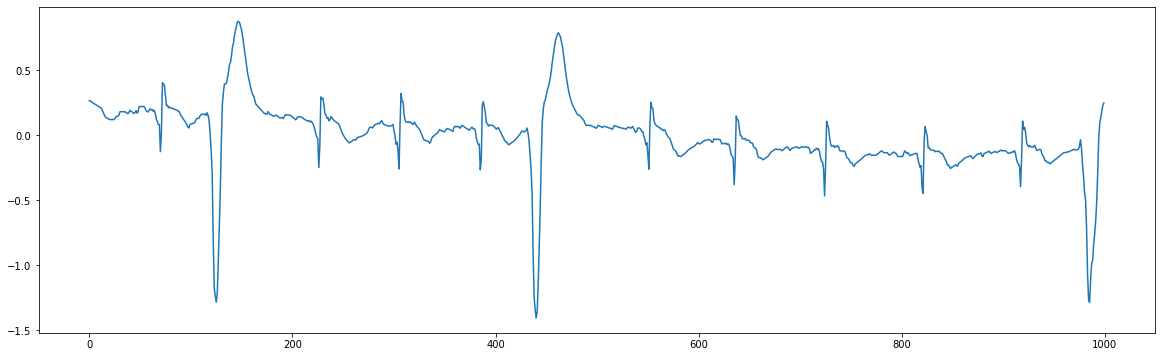

In [8]:
plt.figure(figsize=(20,6))
plt.plot(df_test['v2'])

# Find Features Using Neurokit2
NeuroKit2 is a user-friendly package providing easy access to advanced biosignal processing routines. Researchers and clinicians without extensive knowledge of programming or biomedical signal processing can analyze physiological data with only two lines of code.

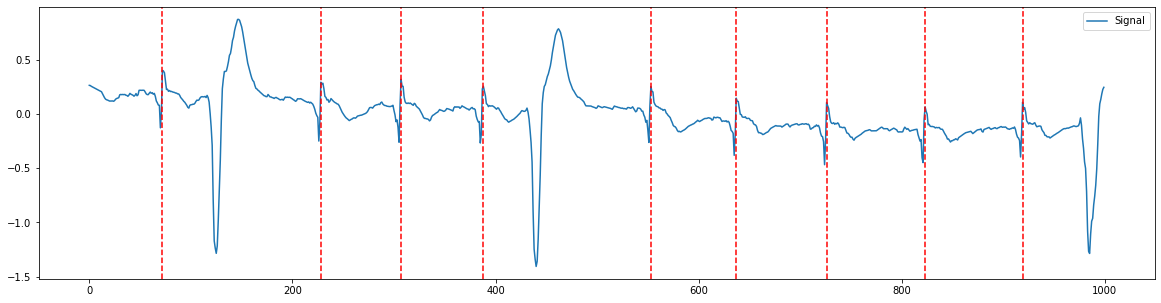

In [9]:
plt.rcParams['figure.figsize'] = [20, 5] 
ecg_signal = df_test['v2']
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=100)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

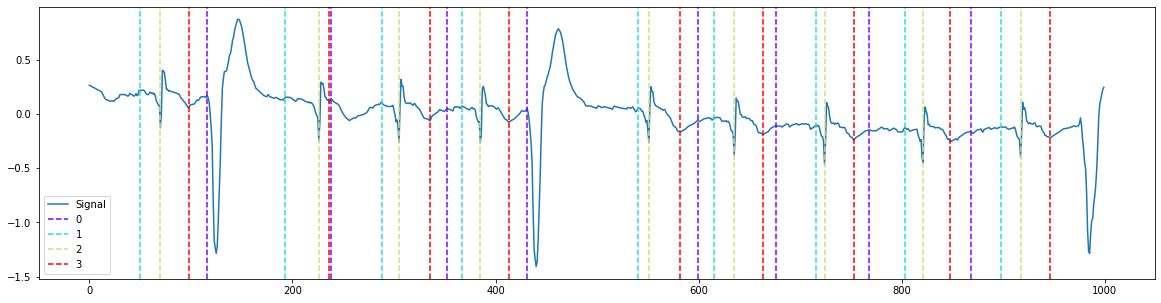

In [10]:
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal)

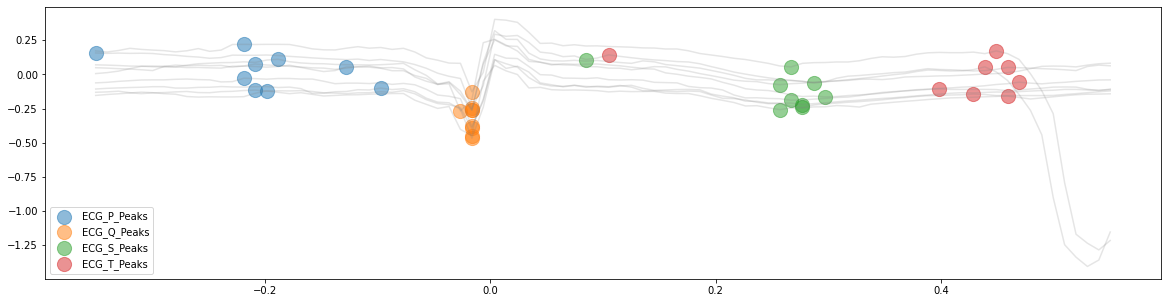

In [11]:
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="peak", show=True, show_type='peaks')

# Visualize P, Q, R, S, T Waves
View visualization of whether every wave obtained is correct or not

## Visualize T Waves

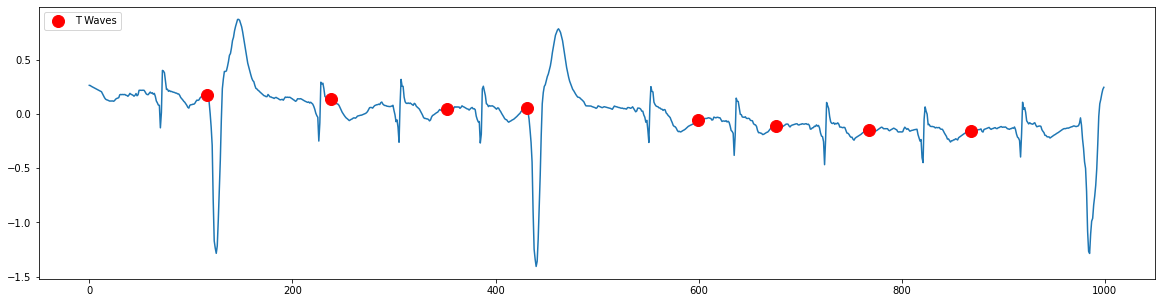

In [12]:
t_peak = waves_peak['ECG_T_Peaks']
t_peak = np.array(t_peak)
t_peak = t_peak[~np.isnan(t_peak)]
t_peak = t_peak.astype('int64')

plt.plot(ecg_signal)
plt.plot(t_peak, ecg_signal[t_peak], "or",  markersize=12, label='T Waves')
plt.legend(loc="upper left")

## Visualize P Waves

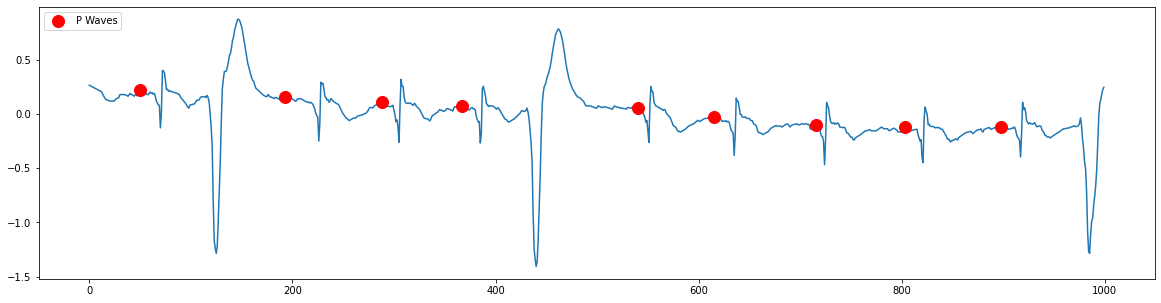

In [13]:
p_peak = waves_peak['ECG_P_Peaks']
p_peak = np.array(p_peak)
p_peak = p_peak[~np.isnan(p_peak)]
p_peak = p_peak.astype('int64')

plt.plot(ecg_signal)
plt.plot(p_peak, ecg_signal[p_peak], "or",  markersize=12, label='P Waves')
plt.legend(loc="upper left")

## Visualize Q Waves

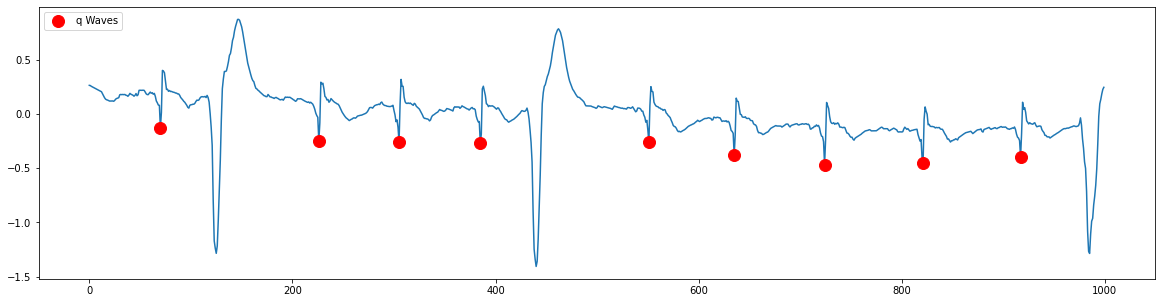

In [14]:
q_peak = waves_peak['ECG_Q_Peaks']
q_peak = np.array(q_peak)
q_peak = q_peak[~np.isnan(q_peak)]
q_peak = q_peak.astype('int64')

plt.plot(ecg_signal)
plt.plot(q_peak, ecg_signal[q_peak], "or",  markersize=12, label='q Waves')
plt.legend(loc="upper left")

## Visualize S Waves

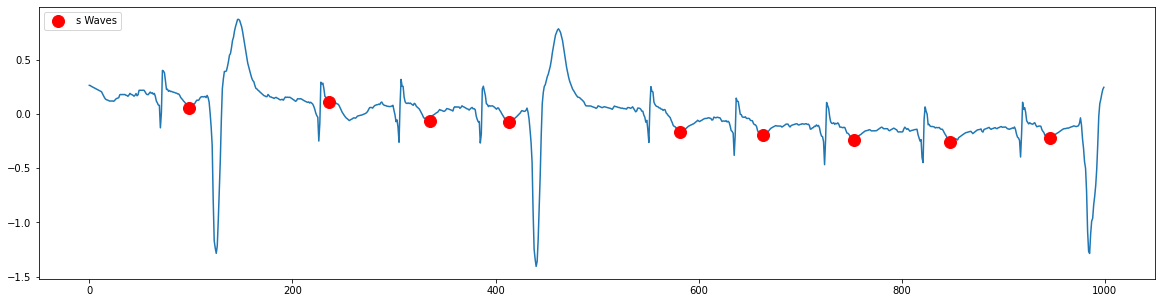

In [15]:
s_peak = waves_peak['ECG_S_Peaks']
s_peak = np.array(s_peak)
s_peak = s_peak[~np.isnan(s_peak)]
s_peak = s_peak.astype('int64')

plt.plot(ecg_signal)
plt.plot(s_peak, ecg_signal[s_peak], "or",  markersize=12, label='s Waves')
plt.legend(loc="upper left")

# Pathological Q Waves and ST Segment Elevation


## Pathalogical Q Waves
Pathological Q Waves is one of the clues that can be seen in the ECG signal that indicates that someone is suffering or has suffered from Myocardial Infraction. Pathological Q Waves indicate the absence of electrical activity, Pathological Q Waves are not an early sign of Myocardial Infraction. But it generally takes several hours until Pathological Q Waves develop and when Pathological Q Waves have developed eating will be difficult to disappear.

Q Waves called Pathological Q Waves are when
*   Has a depth of more than 25% compared to QRS Complex
*   It has a width of more than 40ms or about 1mm
*   Has a depth of more than 2mm
*   Pathological Q Waves can be seen in Lead V1-V3

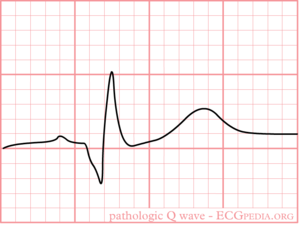


## ST Segment Elevation

The ST segment is the flat part between the end of the S Waves or commonly called titij J (J point) and the beginning of the T Waves on the ECG signal. The ST segment represents the interval between depolarization and ventricular repolarization. Abnormalities that can occur in the ST Segment are elevation which is one of the signs of Myocardial Infraction. ST Segment elevation occurs at J point which has a ≥0.2 mV for men and ≥ 0.15 mV for women which can be seen in V2-V3 leads.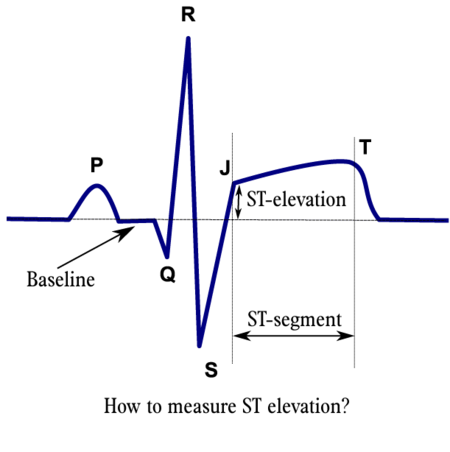

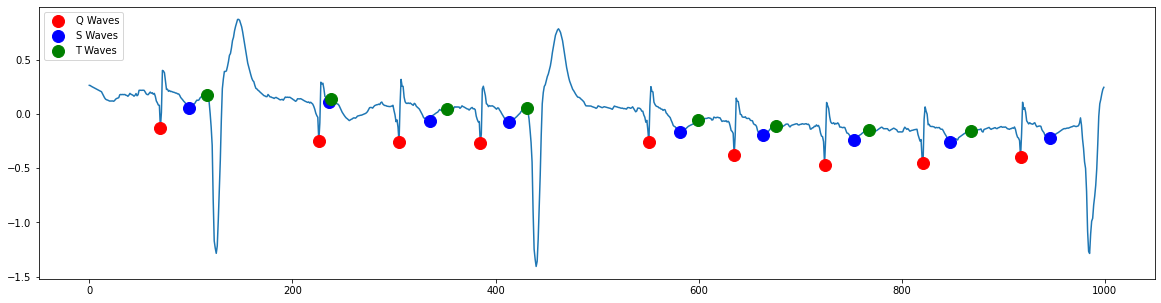

In [16]:
plt.plot(ecg_signal)
plt.plot(q_peak, ecg_signal[q_peak], "or",  markersize=12, label='Q Waves')
plt.plot(s_peak, ecg_signal[s_peak], "ob",  markersize=12, label='S Waves')
plt.plot(t_peak, ecg_signal[t_peak], "og",  markersize=12, label='T Waves')
plt.legend(loc="upper left")

# Create Function Feature Extraction

In [17]:
def get_features_peak(df, lead):
    ecg_signal = df[lead]
    _, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=100)
    _, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=100, method="peak")
    
    t_peak = waves_peak['ECG_T_Peaks']
    t_peak = np.array(t_peak)
    t_peak = t_peak[~np.isnan(t_peak)]
    t_peak = t_peak.astype('int64')
    
    s_peak = waves_peak['ECG_S_Peaks']
    s_peak = np.array(s_peak)
    s_peak = s_peak[~np.isnan(s_peak)]
    s_peak = s_peak.astype('int64')
    
    q_peak = waves_peak['ECG_Q_Peaks']
    q_peak = np.array(q_peak)
    q_peak = q_peak[~np.isnan(q_peak)]
    q_peak = q_peak.astype('int64')
    
    return t_peak, s_peak, q_peak, ecg_signal

In [18]:
def get_q_waves(ecg_signal,q_peak):
    q_wave = []
    q_waves = ecg_signal[q_peak]
    for wave in q_waves:
        q_wave.append(wave)
        
    total_q_wave = sum(q_wave)
        
    if len(q_wave) == 0:
        mean_q_wave = 0
    else:
        mean_q_wave = total_q_wave / len(q_wave)
    
    return mean_q_wave

In [19]:
t_peak_test, s_peak_test, q_peak_test, ecg_signal_test = get_features_peak(df_test, 'v2')
s_peak_test

array([ 98, 236, 335, 413, 582, 663, 753, 848, 946])

In [20]:
t_peak_test

array([116, 238, 352, 431, 599, 676, 768, 868])

In [21]:
ecg_signal_test[t_peak_test]

116    0.172
238    0.143
352    0.051
431    0.055
599   -0.057
676   -0.106
768   -0.144
868   -0.159
Name: v2, dtype: float64

In [22]:
def get_st_segment(ecg_signal,s_peak, t_peak):
    s_length = len(s_peak)
    t_length = len(t_peak)
    st_array = []
    st_total = 0
    
    if s_length > t_length:
        max_iter = t_length
    else:
        max_iter = s_length
        
    for x in range(0,max_iter):
        start = s_peak[x]
        end = t_peak[x] + 1
        st_value = 0
        
        for value in ecg_signal[start:end]:
            st_value = st_value + value
            
        st_array.append(st_value)
        

    st_total = sum(st_array)
    
    if len(st_array) == 0:
        st_mean = 0
    else:
        st_mean = st_total / len(st_array)
    
    return st_mean

# Create Dataset with Feature Extraction

Fetch features of each subject and make into a dataset

In [23]:
path_mi = 'MI'
path_normal = 'NORM'

In [24]:
q_waves = []
st_segment = []
classes = []

for file in glob.glob(path_mi+'/*txt'):
    df = pd.read_csv(file, sep='\t', header=None)
    df.columns = ['Time (elapsed)', 'i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
    t_peak, s_peak, q_peak, ecg_signal = get_features_peak(df, 'v2')
    mean_q_wave = get_q_waves(ecg_signal,q_peak)
    st_segment_mean = get_st_segment(ecg_signal,s_peak, t_peak)
    
    q_waves.append(mean_q_wave)
    st_segment.append(st_segment_mean)
    classes.append(1)

for file in glob.glob(path_normal+'/*txt'):
    df = pd.read_csv(file, sep='\t', header=None)
    df.columns = ['Time (elapsed)', 'i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
    t_peak, s_peak, q_peak, ecg_signal = get_features_peak(df, 'v2')
    mean_q_wave = get_q_waves(ecg_signal,q_peak)
    st_segment_mean = get_st_segment(ecg_signal,s_peak, t_peak)
    
    q_waves.append(mean_q_wave)
    st_segment.append(st_segment_mean)
    classes.append(0)

In [25]:
myocardial_dataset_v2 = {
    'q_waves' : q_waves,
    'st_segment_elevation' : st_segment,
    'report' : classes,
}

myocardial_dataset_df = pd.DataFrame(myocardial_dataset_v2) 
myocardial_dataset_df.to_csv("myocardial_dataset.csv")
myocardial_dataset_df.head()

,q_waves,st_segment_elevation,report
0,-0.317444,-1.085625,1
1,-0.079417,4.426417,1
2,-0.042643,-2.053786,1
3,-0.083455,0.393091,1
4,-0.154667,1.720818,1


# Training using Machine Learning Alghoritm

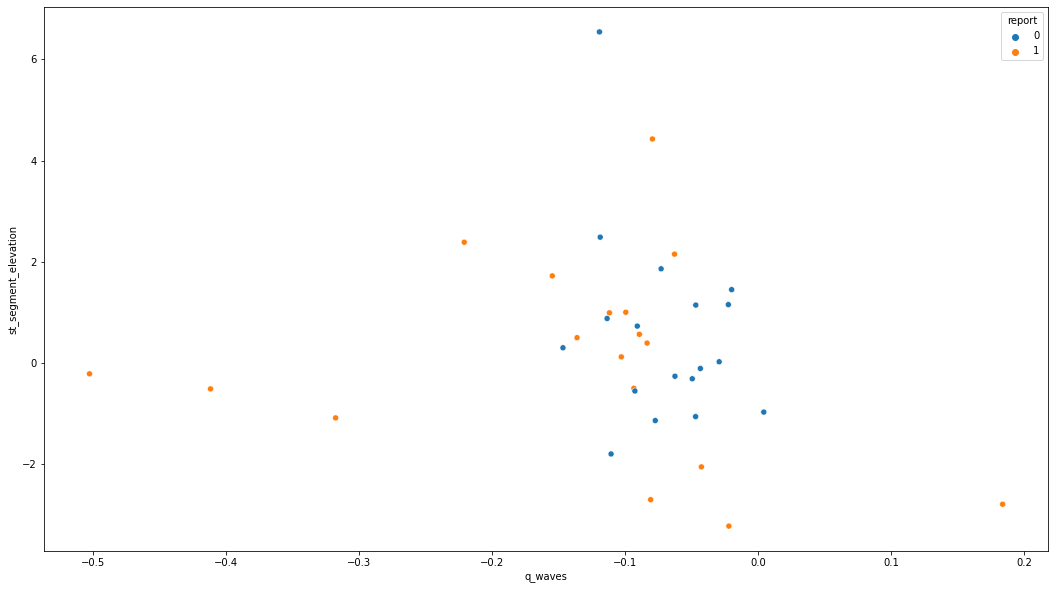

In [26]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='q_waves',y='st_segment_elevation', data=myocardial_dataset_df, hue='report')

In [27]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,7,11,13]
        }
    }
    
}

In [28]:
scores = []
features_scaler = MinMaxScaler()
features = myocardial_dataset_df[['q_waves', 'st_segment_elevation']]
features = features_scaler.fit_transform(features)
label = myocardial_dataset_df['report']

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(features, label)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.553571,"{'C': 30, 'kernel': 'poly'}"
1,random_forest,0.582143,{'n_estimators': 100}
2,logistic_regression,0.496429,{'C': 1}
3,KNN,0.639286,{'n_neighbors': 7}


## Try Using another lead to get better result

In [29]:
q_waves_second = []
st_segment_second = []
classes_second = []

for file in glob.glob(path_mi+'/*txt'):
    df = pd.read_csv(file, sep='\t', header=None)
    df.columns = ['Time (elapsed)', 'i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
    t_peak, s_peak, q_peak, ecg_signal = get_features_peak(df, 'v3')
    mean_q_wave = get_q_waves(ecg_signal,q_peak)
    st_segment_mean = get_st_segment(ecg_signal,s_peak, t_peak)
    
    q_waves_second.append(mean_q_wave)
    st_segment_second.append(st_segment_mean)
    classes_second.append(1)

for file in glob.glob(path_normal+'/*txt'):
    df = pd.read_csv(file, sep='\t', header=None)
    df.columns = ['Time (elapsed)', 'i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
    t_peak, s_peak, q_peak, ecg_signal = get_features_peak(df, 'v3')
    mean_q_wave = get_q_waves(ecg_signal,q_peak)
    st_segment_mean = get_st_segment(ecg_signal,s_peak, t_peak)
    
    q_waves_second.append(mean_q_wave)
    st_segment_second.append(st_segment_mean)
    classes_second.append(0)


myocardial_dataset_v4 = {
    'q_waves' : q_waves_second,
    'st_segment_elevation' : st_segment_second,
    'report' : classes_second,
}

myocardial_dataset_df_second = pd.DataFrame(myocardial_dataset_v4) 
myocardial_dataset_df_second.to_csv("myocardial_dataset.csv")
myocardial_dataset_df_second.head()

,q_waves,st_segment_elevation,report
0,0.016556,-1.362500,1
1,-0.112333,2.541000,1
2,-0.055786,-2.223929,1
3,-0.094700,-0.080909,1
4,-0.154333,0.566857,1


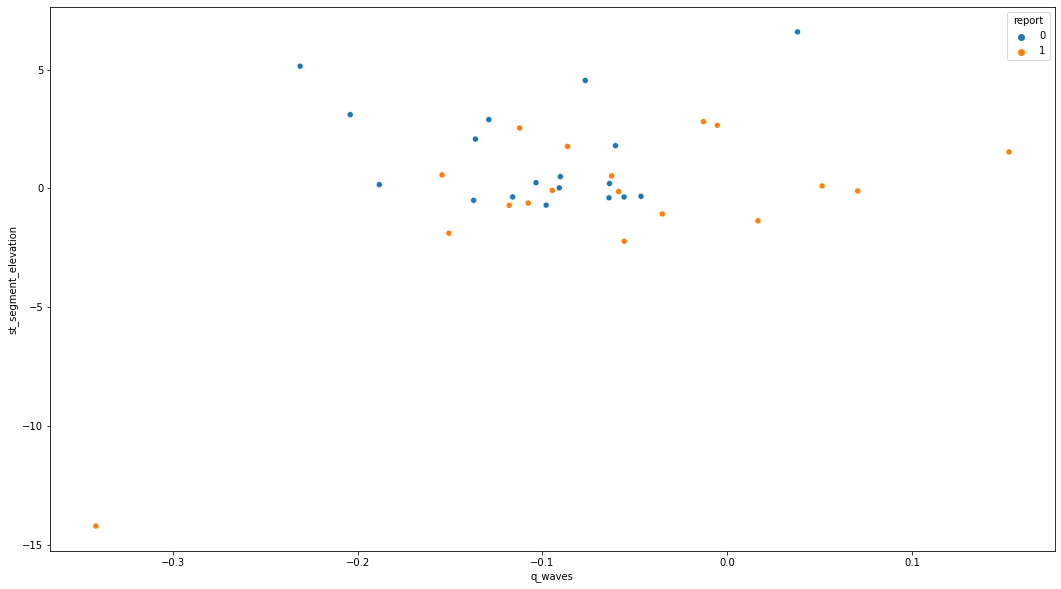

In [30]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='q_waves',y='st_segment_elevation', data=myocardial_dataset_df_second, hue='report')

In [31]:
scores = []
features_scaler_second = MinMaxScaler()
features_second = myocardial_dataset_df_second[['q_waves', 'st_segment_elevation']]
features_second = features_scaler_second.fit_transform(features_second)
label_second = myocardial_dataset_df_second['report']

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(features_second, label_second)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score_second = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score_second

,model,best_score,best_params
0,svm,0.635714,"{'C': 10, 'kernel': 'poly'}"
1,random_forest,0.607143,{'n_estimators': 10}
2,logistic_regression,0.639286,{'C': 5}
3,KNN,0.610714,{'n_neighbors': 13}


# Result Using Best Machine Learning Alghoritm

In [32]:
x_train, x_test, y_train, y_test = train_test_split(features_second, label_second, test_size=0.25, stratify=label_second, random_state=101)

model = SVC(gamma='auto', C=10, kernel='poly')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5555555555555556

Text(69.0, 0.5, 'Truth')

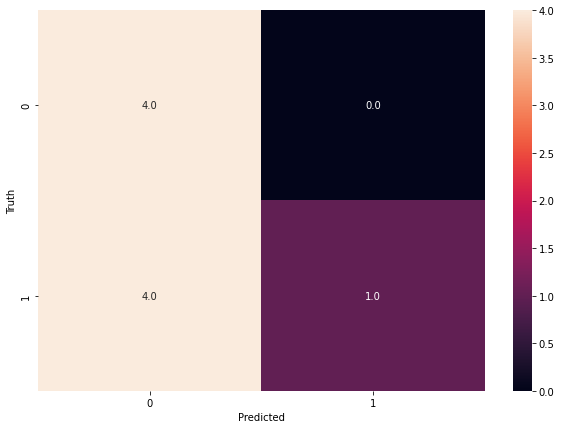

In [33]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))